# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# Task 1: Data validation
## Step 1: Load dataset 
In this step, 'Sales' dataset is import as df

In [31]:
-- Explore the data in the table
SELECT *
FROM 'Sales.csv'

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NA,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NA,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.9,2,27,New Jersey


## Step 2: Understand the data
In this step, I want to know the structure of dataset by using 3 function head(), info(), describe(): 
- **Head():** Return the first 5 rows of the DataFrame
- **Info():** Return the number of non-null values, data types and memory usage
- **Describe():** Return the summary statistics for numerical columns


In [32]:
import pandas as pd
import numpy as np

print(df.head())
print(df.info())
print(df.describe())

   week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   week               15000 non-null  int64 
 1   sales_method       15000 non-null  object
 2   customer_id        15000 non-null  object
 3   nb_sold            15000 non-null  int64 
 4   revenue            15000 non-null  object
 5   years_as_customer  15000 non-null  int64 
 6   nb_site_visits     15000 non-null  int64 
 7   state              15000 non-null  object
dtypes: int64(4), object(4)
memory usage: 937.6+ KB
None
               week      

## Step 3: Validate Data Consistency
After understanding the data structure of this dataset, I want to verify the unique values in all columns.

In [33]:
# Verify unique values in 'week' column
df['week'].value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

In [34]:
# Verify unique values in 'sales_method' column
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

I notice that there are columns where "Email", "email" and "em + call", "Email + Call". In reality this has the same meaning so I need to merge them.

In [35]:
# Standardize the 'sales_method' column to 3 categories
df['sales_method'] = df['sales_method'].str.lower()

# Replace variations with the standardized values
df['sales_method'] = df['sales_method'].replace({
    'em + call': 'email + call',
    'email': 'email',
})

# Check the result to confirm the standardization
print(df['sales_method'].value_counts())


email           7466
call            4962
email + call    2572
Name: sales_method, dtype: int64


In [36]:
# Verify unique values in 'customer_id' column
df['customer_id'].value_counts()

2e72d641-95ac-497b-bbf8-4861764a7097    1
e0c955c5-50b4-43dc-bfdd-e181ac3c8e50    1
8a7a36dd-8fdc-4d08-b87d-4f1548f723be    1
f7c7fcbe-ac44-4e62-a470-b04eb19fb5a1    1
9149e07e-cd2f-4a94-a97b-2f2f475afdbb    1
                                       ..
c1779213-7d49-494b-9aec-f488290bff5a    1
16d14cab-0900-4759-9c18-8569dae8c711    1
3cd54608-5e34-4340-976e-61725b41d175    1
ede3a4b7-94bf-46b2-8bd2-55e009b7c0a9    1
4e077235-7c17-4054-9997-7a890336a214    1
Name: customer_id, Length: 15000, dtype: int64

In [37]:
# Verify that all values in the 'customer_id' column are unique, no duplicates
unique_values_count = df['customer_id'].nunique()
print(f"Number of unique values in 'sales_method' column: {unique_values_count}")

Number of unique values in 'sales_method' column: 15000


In [38]:
# Verify unique values in 'nb_sold' column
df['nb_sold'].value_counts().sort_index()

7      698
8     1941
9     3535
10    3677
11    2439
12    1088
13     939
14      97
15     555
16      31
Name: nb_sold, dtype: int64

In [39]:
# Verify unique values in 'years_as_customer' column
df['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: years_as_customer, dtype: int64

I notice that Pens and Printers was founded in 1984, hence rows with years greater than 40 need to be cleaned.

In [40]:
# Dropping rows that are customer outliers which are greater than 40
df.drop(df[df['years_as_customer'] > 40].index, axis=0, inplace=True)

df['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
Name: years_as_customer, dtype: int64

In [41]:
# Verify unique values in 'nb_site_visits' column
df['nb_site_visits'].value_counts()

25    1688
26    1645
24    1600
23    1478
27    1439
22    1200
28    1175
21     908
29     893
30     654
20     600
19     426
31     371
32     250
18     217
33     114
17     113
16      80
34      51
35      33
15      31
36      14
14       7
37       5
13       4
12       1
41       1
Name: nb_site_visits, dtype: int64

In [42]:
# Verify unique values in 'state' column
df['state'].value_counts()

California        1870
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [43]:
# Verify the number of States 
df['state'].nunique()

50

## Step 4: Handle missing data
In this step, I use isnull().sum() to count the missing values in dataset. Surprisingly, there are no missing values, however, the data type of 'revenue' column is object. It is explained by the fact that the missing values in 'revenue' column is written as 'NA'. First, I count the number of 'NA' in 'revenue' column.

In [44]:
# Check the missing values
print(df.isnull().sum())

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


In [45]:
# Count occurrences of 'NA' as a string in the 'revenue' column
na_revenue_count = df['revenue'].apply(lambda x: x == 'NA').sum()

print(f"Number of 'NA' values in 'revenue' column: {na_revenue_count}")


Number of 'NA' values in 'revenue' column: 1074


After counting the 'NA' values in the 'revenue' column, I replace 'NA' values by NaN to represent the missing values in pandas since the 'NA' is just a string representation of missing data.

In [46]:
import numpy as np
import pandas as pd

# Step 1: Replace 'NA' string with NaN
df['revenue'] = df['revenue'].replace('NA', np.nan)

# Step 2: Check the missing values
print(df.isnull().sum())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


To determine the suitable solutions for missing values, I need to figure out the missing type of it by analyzing the pattern of the missing data and the potential relationship between the missingness and other variables. By definitions: 
-  **MCAR (Missing Completely At Random):** Missingness is independent of both observed and unobserved data. In other words, the missing data has no relationship with other data points.
- **MAR (Missing At Random):** Missingness is related to observed data, but not to the unobserved data. In other words, the missing values may depend on other variables in the dataset but not on the missing values themselves.
- **MNAR (Missing Not At Random):** Missingness is related to unobserved data. The reason data is missing depends on the value of the missing data itself.

This is the heatmap where we find the correlation between the missing values and other variables. After that, I check the presence of missing data depends on other columns.

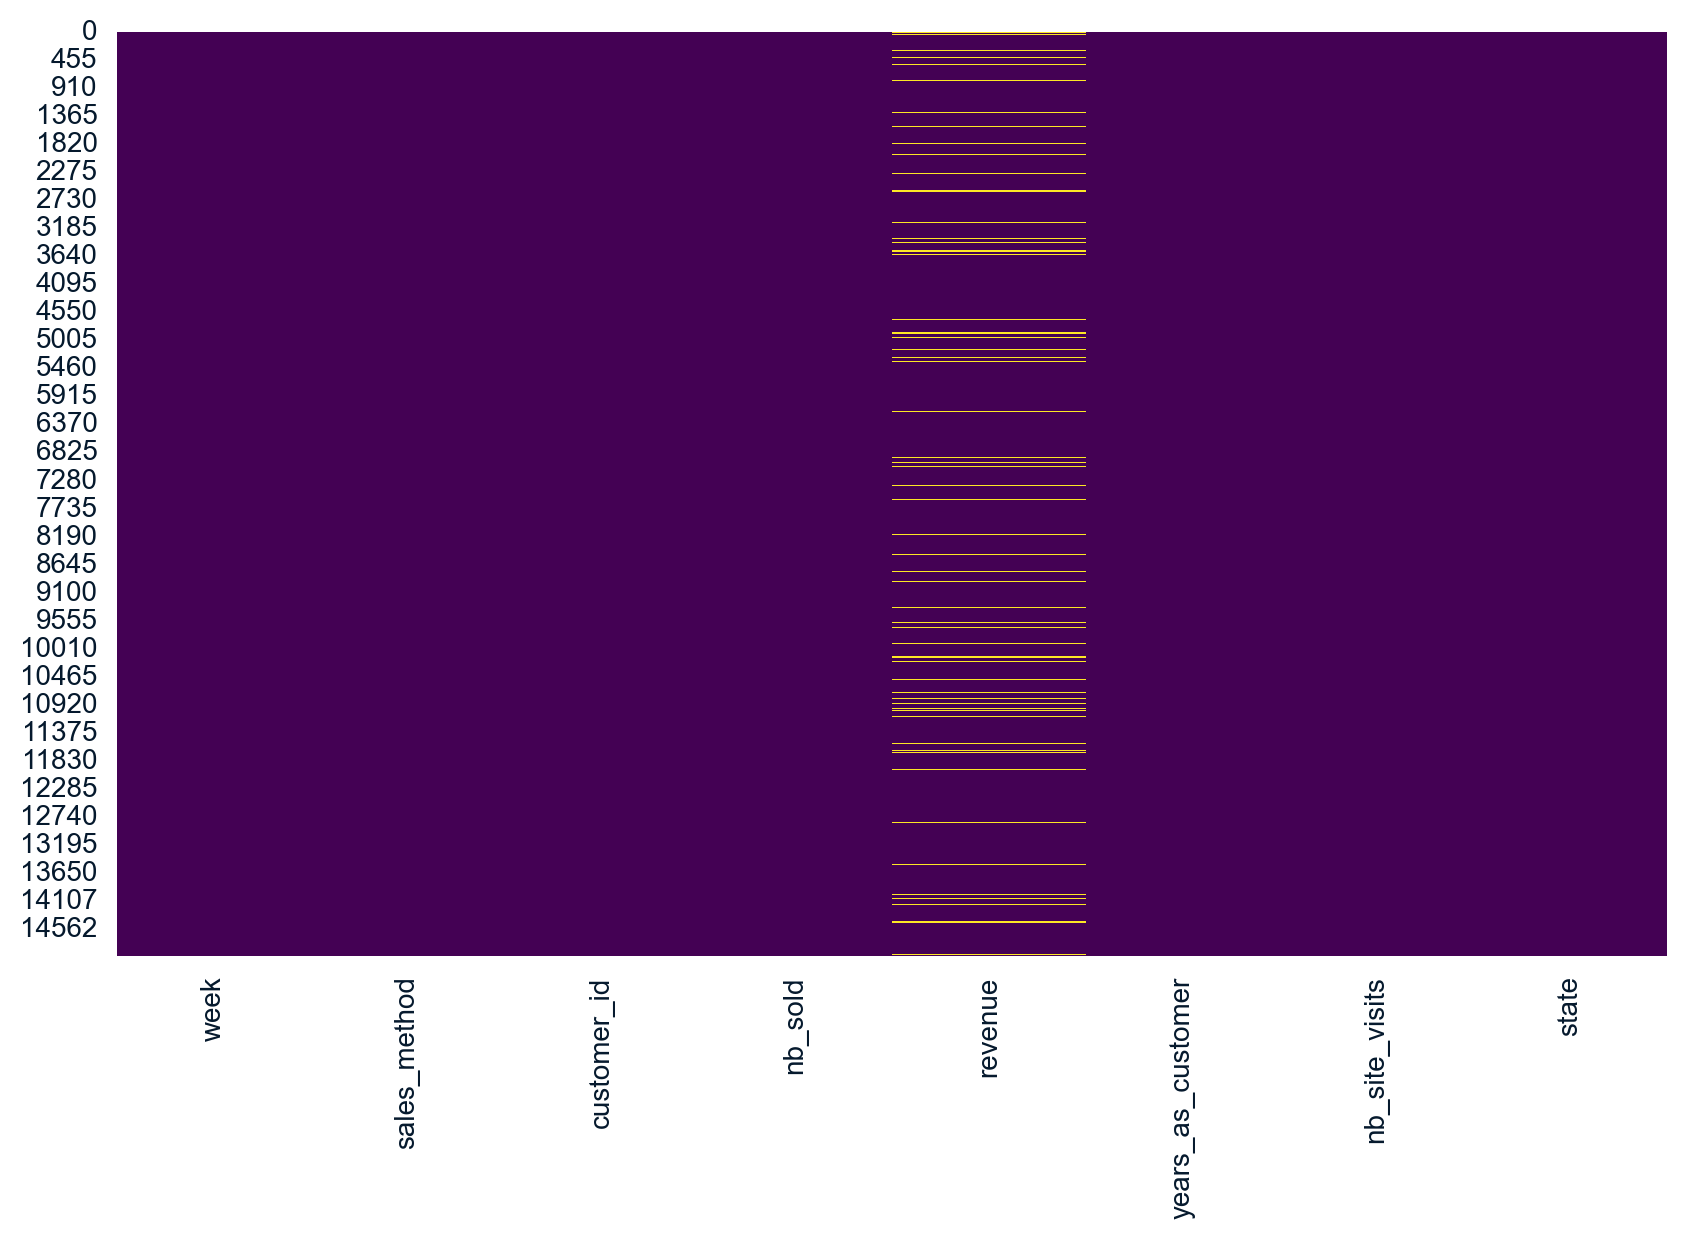

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [48]:
# Check if missing values in 'revenue' are related to 'sales_method' column
missing_revenue = df[df['revenue'].isnull()]
not_missing_revenue = df[df['revenue'].notnull()]

# Compare summary statistics for these groups (e.g., compare 'sales_method' between missing and not missing)
print(missing_revenue['sales_method'].value_counts())
print(not_missing_revenue['sales_method'].value_counts())


email           544
email + call    349
call            181
Name: sales_method, dtype: int64
email           6921
call            4780
email + call    2223
Name: sales_method, dtype: int64


### Conclusion 
This missingness can be **Missing at Random (MAR)**, since the missing values are likely related to 'sales_method' column. After figuring out the missing type, I can use regression imputation technique to fill the missing values, then evaluate the result of the model.

In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Copy df to df_sample for further prediction
df_sample = df.copy()

# Separate rows with and without missing revenue
df_notnull = df_sample[df_sample['revenue'].notnull()]
df_null = df_sample[df_sample['revenue'].isnull()]

# Define features and target
features = ['week', 'sales_method', 'nb_sold', 'years_as_customer', 'nb_site_visits', 'state']
target = 'revenue'

X_train = df_notnull[features]
y_train = df_notnull[target]
X_pred = df_null[features]

# Preprocess: One-hot encode categorical features
categorical_features = ['sales_method', 'state']
numeric_features = ['week', 'nb_sold', 'years_as_customer', 'nb_site_visits']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric columns
)

# Build regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model and predict missing revenue
pipeline.fit(X_train, y_train)
predicted_revenue = pipeline.predict(X_pred)

# Fill in missing revenue values
df_sample.loc[df_sample['revenue'].isnull(), 'revenue'] = predicted_revenue

df_sample

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,98.758586,0,24,Arizona
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,108.206594,3,25,Indiana
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.9,2,27,New Jersey


In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Copy the full dataset with no missing revenue
df_complete = df_sample[df_sample['revenue'].notnull()].copy()

# 2. Randomly hide (mask) some known revenue values
np.random.seed(42)
mask_size = int(0.2 * len(df_complete))  # Hide 20% of data
mask_indices = np.random.choice(df_complete.index, size=mask_size, replace=False)

df_masked = df_complete.copy()
df_masked.loc[mask_indices, 'revenue'] = np.nan

# 3. Apply the same regression imputation on the masked dataset
X_train_masked = df_masked[df_masked['revenue'].notnull()][features]
y_train_masked = df_masked[df_masked['revenue'].notnull()]['revenue']
X_pred_masked = df_masked[df_masked['revenue'].isnull()][features]

# Fit the model again
pipeline.fit(X_train_masked, y_train_masked)
predicted_revenue_masked = pipeline.predict(X_pred_masked)

# 4. Compare imputed vs true values
true_values = df_complete.loc[mask_indices, 'revenue']
imputed_values = pd.Series(predicted_revenue_masked, index=mask_indices)

# 5. Evaluate
rmse = mean_squared_error(true_values, imputed_values, squared=False)
mae = mean_absolute_error(true_values, imputed_values)

print(f"RMSE (imputation): {rmse:.2f}")
print(f"MAE (imputation): {mae:.2f}")


RMSE (imputation): 69.50
MAE (imputation): 52.89


The result of this model is not as good as I expect, and considering that the percentage of missing values compare to non-missing values is under 10% so I can drop it.

In [51]:
# Removing missing values from all columns
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   week               13924 non-null  int64 
 1   sales_method       13924 non-null  object
 2   customer_id        13924 non-null  object
 3   nb_sold            13924 non-null  int64 
 4   revenue            13924 non-null  object
 5   years_as_customer  13924 non-null  int64 
 6   nb_site_visits     13924 non-null  int64 
 7   state              13924 non-null  object
dtypes: int64(4), object(4)
memory usage: 979.0+ KB


## Step 5: Handle duplicates
One of the most important step is to remove the duplicate value in the dataset to ensure data integrity, avoid redundant processing and other benefits.

In [52]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   week               13924 non-null  int64 
 1   sales_method       13924 non-null  object
 2   customer_id        13924 non-null  object
 3   nb_sold            13924 non-null  int64 
 4   revenue            13924 non-null  object
 5   years_as_customer  13924 non-null  int64 
 6   nb_site_visits     13924 non-null  int64 
 7   state              13924 non-null  object
dtypes: int64(4), object(4)
memory usage: 979.0+ KB


## Step 6: Convert Data types
In this step, I will correct the column data types. I notice that revenue column is defined as object. I need to change it into integer.

In [53]:
df['revenue'] = df['revenue'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13924 non-null  int64  
 1   sales_method       13924 non-null  object 
 2   customer_id        13924 non-null  object 
 3   nb_sold            13924 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  13924 non-null  int64  
 6   nb_site_visits     13924 non-null  int64  
 7   state              13924 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.0+ KB


## Data Validation Summary

Outlined below are the validation and cleaning steps performed across all 13924 rows and 8 columns in the dataset:

**Week:**
Covers weeks 1 through 6, representing the period immediately after the product launch — a key phase for gauging early market performance. The data in this column is clean and requires no modifications.

**Sales Method:**
Standardized variations such as 'email', 'Email', 'em + call', 'Email + Call', and 'Call' into three clear categories: 'Email', 'Email + Call', and 'Call'. This simplification helps clarify the effectiveness of different outreach strategies.

**Customer ID:**
All 13924 records include a unique customer ID, enabling transaction-level tracking for each customer. No cleaning was necessary for this column.

**Nb_sold:**
Each transaction reflects between 7 and 16 units sold, indicating a mid-range sales volume per customer. Data here is consistent and valid, with no cleaning needed.

**Revenue:**
Imputed 1,074 missing revenue values to ensure financial analysis remains comprehensive and reliable. Only columns with missing values were adjusted by dropping them.

**Years as Customer:**
Removed two outlier rows (47 & 63) where customers had been with the company longer than possible, considering Pens and Printers was established in 1984.


**Nb_site_visits:**
The column is valid and needs no cleaning.

**State:**
Confirmed the presence of all 50 U.S. states. This column was accurate and did not require modification.

# Task 2: Exploratory Analysis
## 1. How many customers were there for each approach?

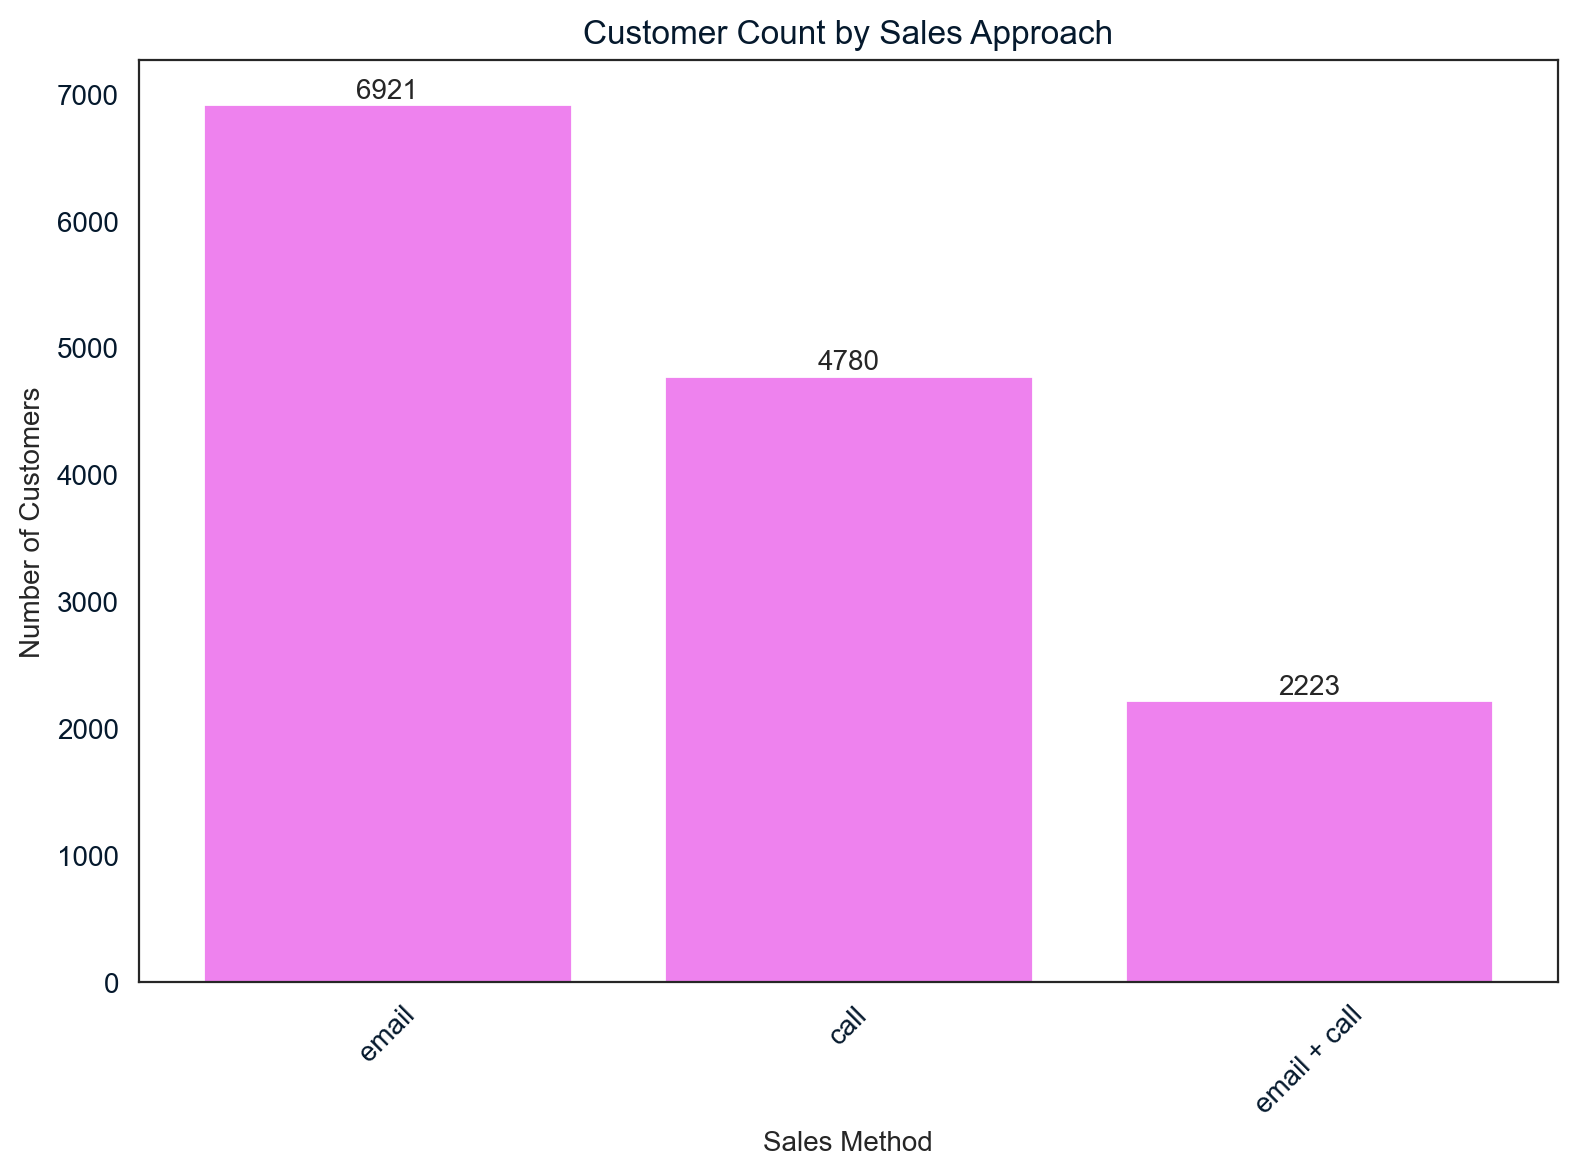

In [62]:
# Create a bar chart
customer_count_by_method = df['sales_method'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(customer_count_by_method.index, customer_count_by_method.values, color='violet')

# Add the text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom')

plt.title('Customer Count by Sales Approach')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart, titled "Customer Count by Sales Approach," illustrates the distribution of customers across three different sales strategies: Email, Call, and Email + Call.

Among the three, the Email method engages the highest number of customers, totaling 6,921. The Call method follows with 4,780 customers. Meanwhile, the combined approach of Email + Call attracts the fewest customers, with 2,223.

## 2. What does the spread of the revenue look like overall? And for each method?

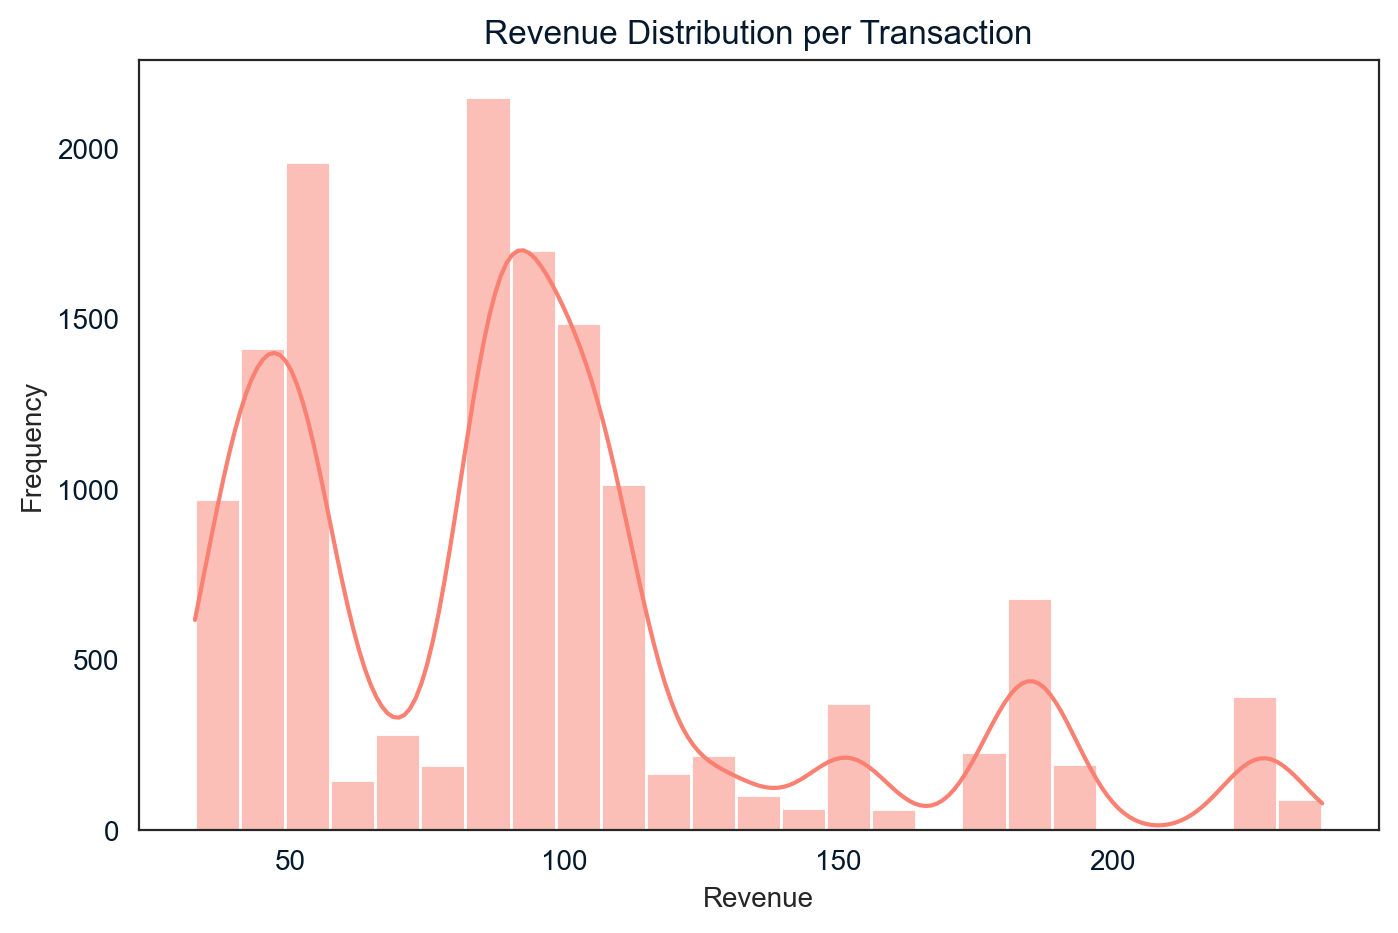

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(df['revenue'], bins=25, color='salmon', kde=True)
plt.title('Revenue Distribution per Transaction')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

- **Top Sales Zones:** The spikes in sales around 50 and 90 units point to where demand is strongest. These may represent optimal pricing points or the most popular products in the lineup.

- **Sales High Points:** The sharp rises near 50 and 90 units highlight the most frequently purchased quantities.

- **Low Sales Areas:** Sales dip noticeably around 70 units and beyond 120, suggesting these quantities are less attractive to customers and might be less profitable to focus on.
- **Other Insights** Transactions above $150 are infrequent but could represent premium or bulk purchases, potentially worth targeting with specialized campaigns.

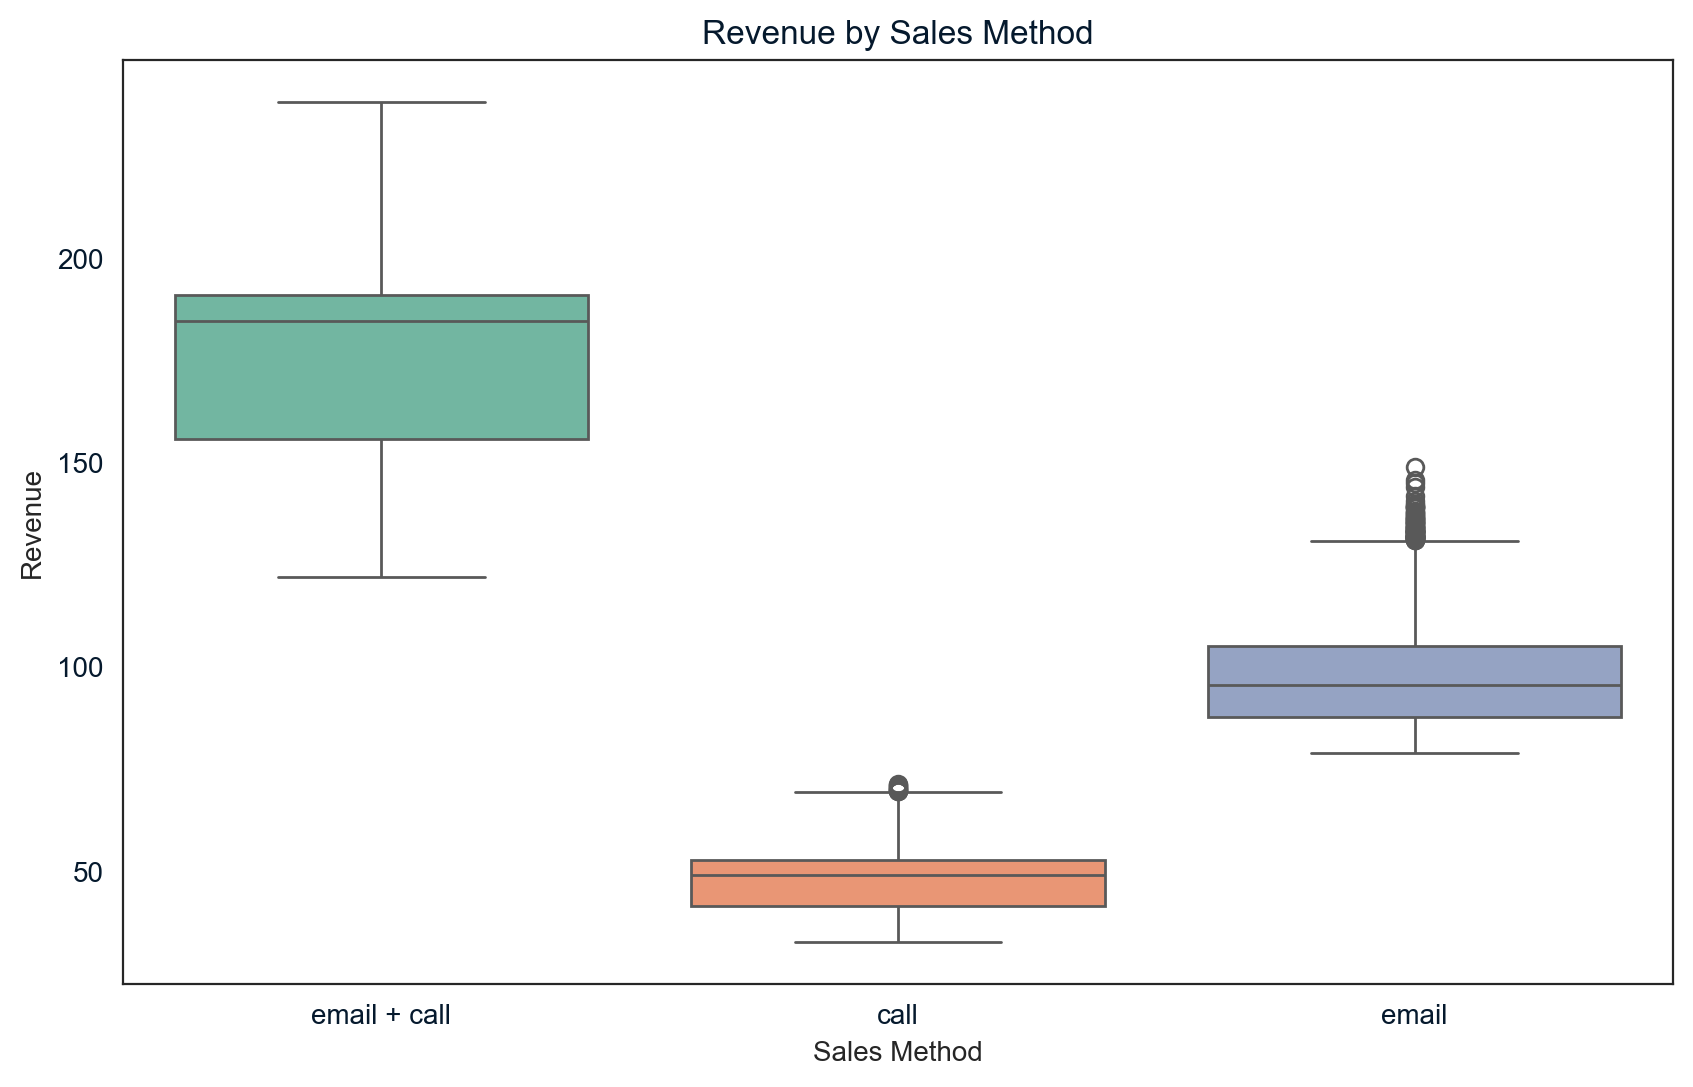

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sales_method', y='revenue', palette='Set2')
plt.title('Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

**Email + Call:** This method exhibits a broad revenue range, between under 150 and over 200. The presence of outliers above 200 signifies exceptional sales occurrences, likely from combined communication efforts leading to higher transaction values.

**Call:** The revenue for the 'Call' method mostly centers around 50, with some outliers above this mark. These outliers suggest that even though the call method tends to yield moderate transaction sizes, it can occasionally result in significantly higher sales, possibly from successful negotiations or in-depth customer interactions.

**Email:** The 'Email' method shows a concentration of sales under 100 and just over 100, with outliers around 150. These outliers may represent successful marketing campaigns or special offers that have resonated with customers, prompting them to spend more.

## 3. Was there any difference in revenue over time for each of the methods?

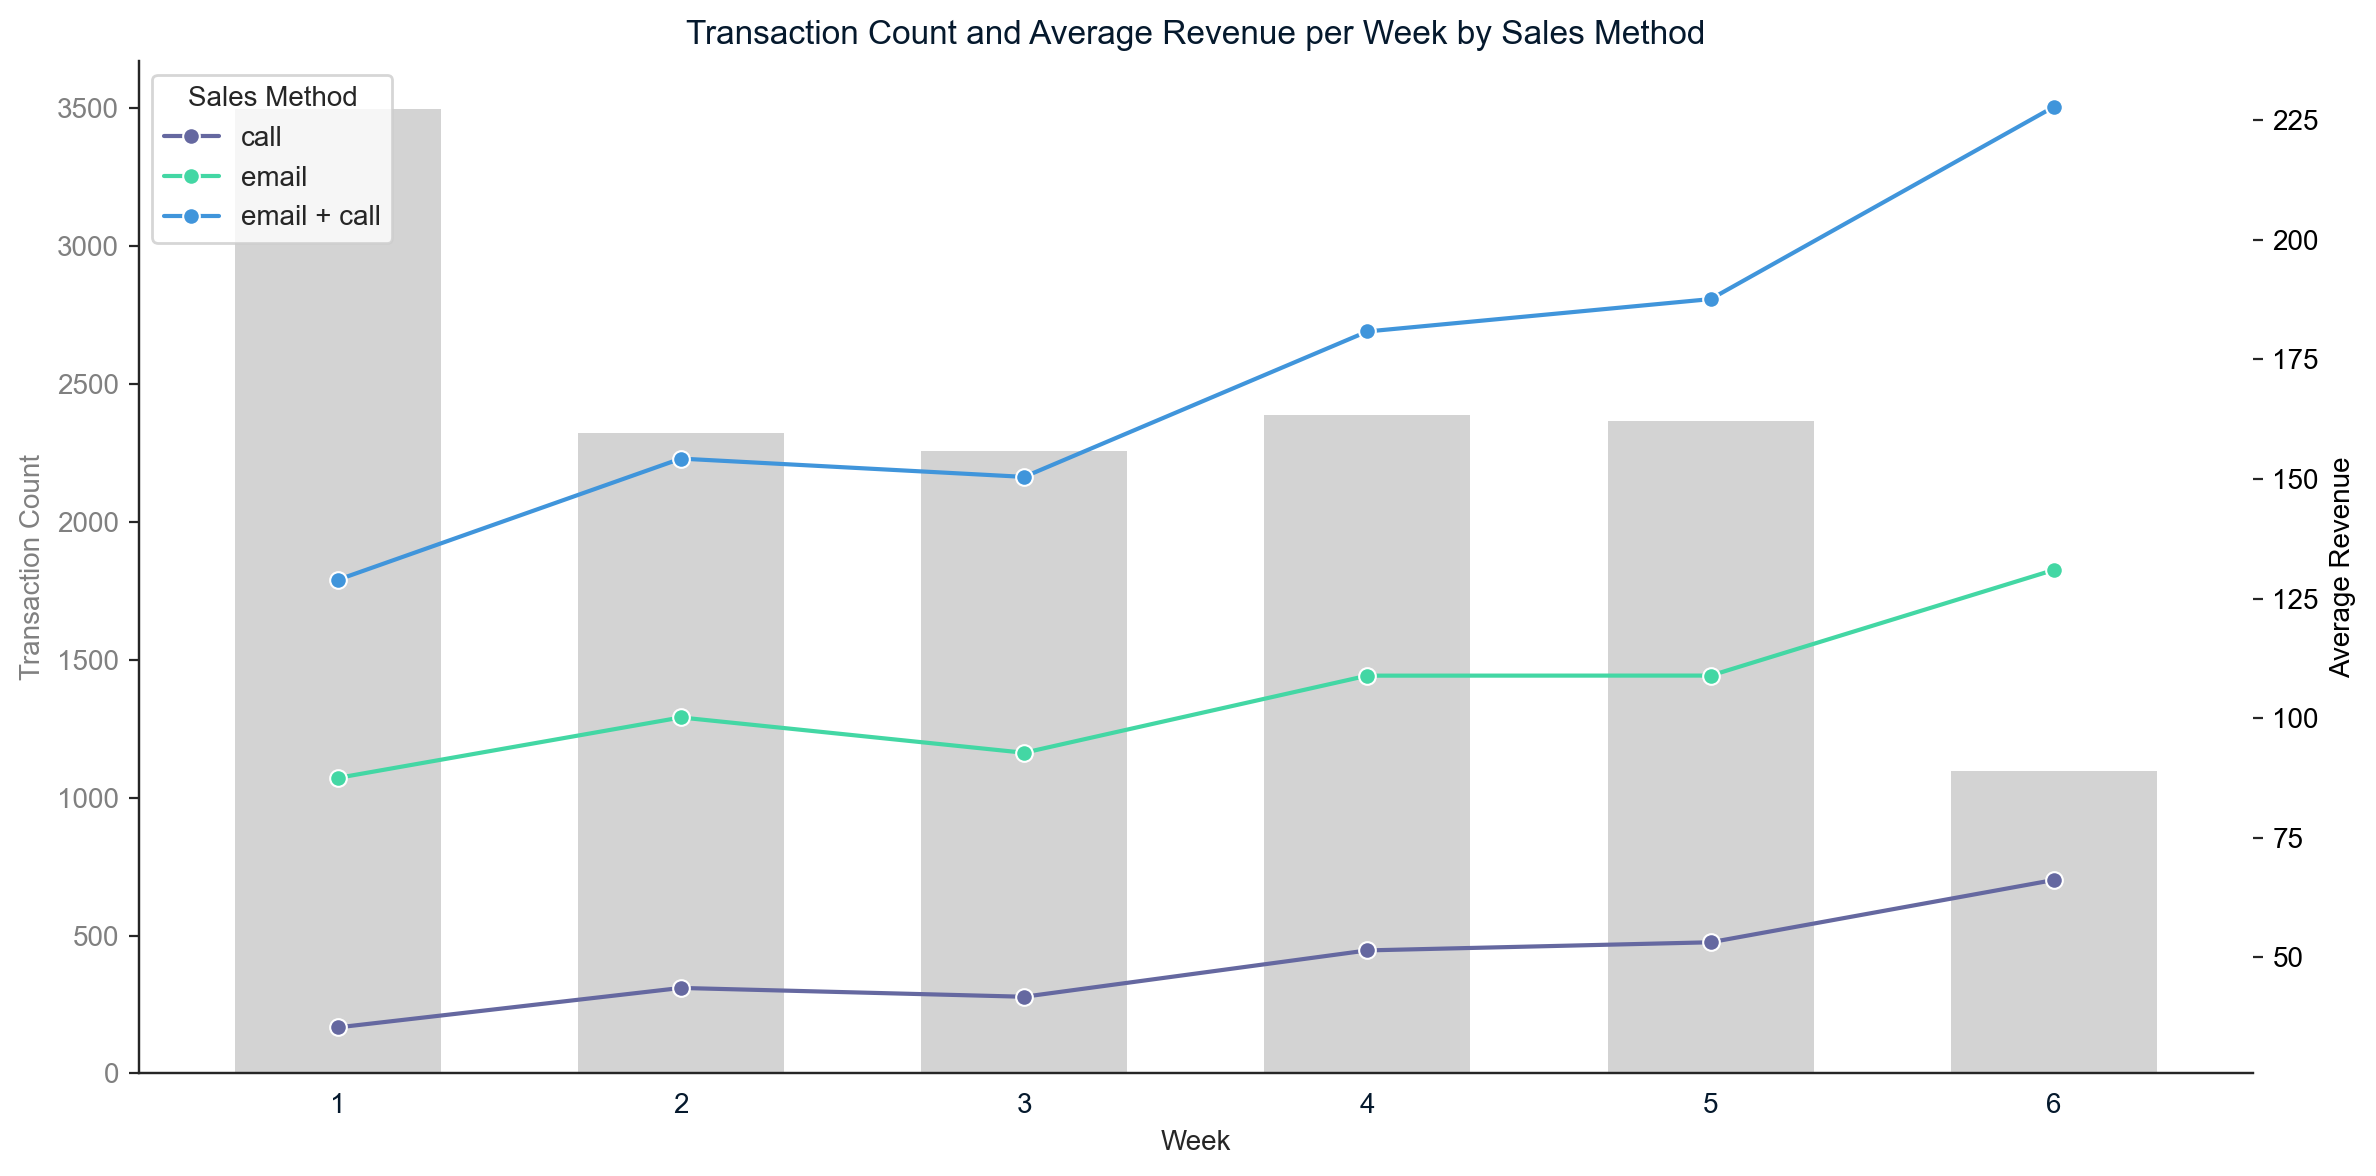

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'week' is numeric
df['week'] = df['week'].astype(int)

# Group data
transaction_counts = df.groupby('week').size().reset_index(name='transaction_count')
avg_revenue = df.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

# Sort to ensure alignment
transaction_counts = transaction_counts.sort_values('week')
avg_revenue = avg_revenue.sort_values('week')

# Set style
sns.set_style("white")

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart
bar_width = 0.6
ax1.bar(transaction_counts['week'], transaction_counts['transaction_count'], width=bar_width, color='lightgray', edgecolor='none')
ax1.set_ylabel('Transaction Count', color='gray')
ax1.set_xlabel('Week')
ax1.set_xticks(transaction_counts['week'])
ax1.tick_params(axis='y', labelcolor='gray')

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add line plot on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=avg_revenue, x='week', y='revenue', hue='sales_method', marker='o', ax=ax2)
ax2.set_ylabel('Average Revenue', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Remove top and right spines from the second axis too
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Final touches
plt.title('Transaction Count and Average Revenue per Week by Sales Method')
ax2.legend(title='Sales Method', loc='upper left')
plt.tight_layout()
plt.show()


### **Email + Call is the Most Effective Sales Method** :
- It consistently yields the highest average revenue per transaction, increasing steadily from week 1 to week 6.
### **Call-Only Has the Lowest Performance** :
- It indicates low efficiency and low volume by the smallest transaction count and lowest average revenue.
### **Steady Growth in Revenue Efficiency** :
- All three sales methods demonstrate a positive trend in average revenue per transaction over the weeks since product launch. This suggests growing revenue efficiency (meaning each transaction is becoming more valuable), likely due to: better sales execution, increased customer trust or familiarity with the product or more refined targeting and messaging over time.
### **Transaction count peaked in Week 1:**
- The number of transactions was highest in the first week, possibly due to launch promotions or marketing push.
- Post-launch, volume stabilized around Weeks 2–5, with a noticeable dip in Week 6.

## 4. Based on the data, which method would you recommend we continue to use?

I will introduce you 2 metrics that are vital for the recommendations: SEI and ASEI.

### **Calculation: SEI and ASEI**

**SEI = (Revenue / Sales & Marketing Cost)**, where:
- Revenue is the total revenue per sales method.

- Sales & Marketing Cost can be approximated by effort cost.

**Assumption (Effort per Transaction):**

- Email = 1 unit of effort

- Call = 2 units of effort (often more direct and time-consuming)

- Email + Call = 3 units of effort (sum of Email and Call)

**ASEI = Average (SEI per transaction count)**, where:
- SEI is the metric that is calculated above.


In [59]:
# Total Revenue Generated by Each Method
total_revenue_by_method = df.groupby('sales_method')['revenue'].sum()

# Assuming the following effort scores (as previously defined):
effort_scores = {'email': 1, 'call': 2, 'email + call': 3}

# Calculating SEI for each sales method
sei = total_revenue_by_method / total_revenue_by_method.index.map(effort_scores)

# Preparing a DataFrame for easier analysis
analysis_df = pd.DataFrame({
    'Total Revenue': total_revenue_by_method,
    'SEI': sei
}).round(2)  # Round to 2 decimal places

# Resetting index for display
analysis_df.reset_index(inplace=True)

analysis_df


,sales_method,Total Revenue,SEI
0,call,227513.02,113756.51
1,email,672220.61,672220.61
2,email + call,408256.69,136085.56


### **Result**
Based on the analysis, here are the key metrics for each sales method:

**Call:** Total Revenue: $227,513.02, SEI: 113,756.51 

**Email** Total Revenue: $672,220.61, SEI: 672,220.61  

**Email + Call** Total Revenue: $408,256.69, SEI: 136,085.56 

In [66]:
# Define custom effort scores for each sales method
effort_scores = {
    'email': 1,
    'call': 2,
    'email + call': 3  # Additive model: 1 (email) + 2 (call)
}

# Group by sales_method only
asei_by_method = df.groupby('sales_method').agg(
    total_revenue=('revenue', 'sum'),
    transaction_count=('revenue', 'count')
).reset_index()

# Map effort scores to each sales_method
asei_by_method['effort_per_transaction'] = asei_by_method['sales_method'].map(effort_scores)

# Calculate Total Effort = transaction count * effort per transaction
asei_by_method['total_effort'] = asei_by_method['transaction_count'] * asei_by_method['effort_per_transaction']

# Calculate SEI = total revenue / total effort
asei_by_method['ASEI'] = asei_by_method['total_revenue'] / asei_by_method['total_effort']

# Round to 2 decimal places
asei_by_method = asei_by_method.round(2)

asei_by_method


,sales_method,total_revenue,transaction_count,effort_per_transaction,total_effort,ASEI
0,call,227513.02,4780,2,9560,23.80
1,email,672220.61,6921,1,6921,97.13
2,email + call,408256.69,2223,3,6669,61.22


### **Result**
Based on the analysis, here are the key metrics for each sales method:

**Call:** Total Revenue: $227,513.02, Transaction count: 4780, ASEI: 23.8

**Email** Total Revenue: $672,220.61, Transaction count: 6921, ASEI: 97.13   

**Email + Call** Total Revenue: $408,256.69, Transaction count: 2223, ASEI: 61.22 

### **Recommendation**
**1. Prioritize Email**
- Highest ASEI, SEI means best return on effort.
- Indicates that email alone is both scalable and cost-effective.

**2. Maintain Email + Call for Targeted Segments**
- Balanced in terms of effort and return.
- May be effective for warm leads or high-value customers needing more attention.

**3. Reassess Call-Only Campaigns**
- Lowest ASEI, SEI: high cost in terms of effort, with comparatively low revenue.

**Summary**
- Maximize efficiency → Prioritize Email campaigns
- Boost conversion selectively → Use Email + Call as a hybrid tool
- Reduce low-yield effort → Scale back on Call-only campaigns

## **Final summary with recommendation for business**
**Sales Method Effectiveness**:

The "Email + Call" strategy tends to generate the highest total revenue, but it also involves the greatest effort. In contrast, "Email" alone is the most efficient method when evaluated using both SEI and ASEI, delivering solid returns with minimal resource use.

**Revenue Trends Over Time:**

Revenue fluctuates week to week across all methods. However, "Email + Call" shows a noticeable upward trend, indicating it becomes more effective under the right conditions.

**Customer Interaction Patterns:**

Engagement levels vary by sales method, highlighting the importance of aligning sales efforts with customer behavior and preferences to maximize impact.

### **Key Recommendations**

**Capitalize on High-Efficiency Channels:**

Prioritize the Email method where possible. It provides the best return per effort, making it ideal for scaling efficiently, especially when resources are limited.

**Leverage Combined Methods for High-Stakes Sales:**

Use "Email + Call" selectively for high-potential leads or important clients, where the increased effort is justified by higher returns.

**Review Pure Call Strategies:**

Since the Call method delivers the lowest efficiency, assess how it's being used. Consider improving training, refining the approach, or supporting it with technology to improve outcomes.

**Track ASEI Consistently:**

Incorporate ASEI into your regular performance monitoring. It offers a balanced view of revenue vs. effort, supporting smarter decision-making around where to invest time and resources.

**Adopt a Customer-Focused Mindset:**

Adjust your outreach approach based on segment-specific behaviors. Personalized strategies are more likely to resonate and lead to better results.

**Stay Agile and Iterative:**

Continuously analyze performance data and update sales strategies to stay aligned with evolving customer needs and market dynamics.

By focusing on efficiency-driven methods, making data-informed strategic choices, and staying flexible, the business can build a sustainable and effective sales model that supports long-term growth.